In [1]:
import pandas as pd
import numpy as np

In [ ]:
#To download the database uncomment the following lines

#data = 'https://github.com/mary435/cardiovascular_diseases_risk_model/blob/28c9346a431fdfe8543174c9ea6af4dfd89074c9/cardiovascular_diseases_dv3.csv'
#!wget $data

In [2]:
data = 'cardiovascular_diseases_dv3.csv'

# Data Preparation

In [3]:
df = pd.read_csv(data ,delimiter=';')
df

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df

,age,gender,height,weight,ap_high,ap_low,cholesterol,glucose,smoke,alcohol,physical_activity,cardio_disease
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [6]:
df.isnull().sum()

age                  0
gender               0
height               0
weight               0
ap_high              0
ap_low               0
cholesterol          0
glucose              0
smoke                0
alcohol              0
physical_activity    0
cardio_disease       0
dtype: int64

In [7]:
df.dtypes

age                  int64
gender               int64
height               int64
weight               int64
ap_high              int64
ap_low               int64
cholesterol          int64
glucose              int64
smoke                int64
alcohol              int64
physical_activity    int64
cardio_disease       int64
dtype: object

In [8]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_high', 'ap_low', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'physical_activity', 'cardio_disease'],
      dtype='object')

In [9]:
cols = ['age', 'gender', 'height', 'weight', 'ap_high', 'ap_low', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'physical_activity']

# EDA

In [10]:
df.cardio_disease.value_counts(normalize=True)

0    0.505096
1    0.494904
Name: cardio_disease, dtype: float64

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print()

age
[50 55 52 48 60 61 62 54 41 40 46 58 59 63 64 57 56 49 51 44 65 45 53 47
 42 39 43 30]
28

gender
[2 1]
2

height
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  97 119 130 110 193
  75 132  71 135  67  70 125 139 133  74 112 207  68  55  81  80  64  91
  60 109  72 197  65 128 105 108 104 111 113  96 131  59  99  57]
106

weight
[ 62  85  64  82  56  67  93  95  71  68  80  60  78 112  75  52  83  69
  90  45  65  59  66  74 105  73  55  70  72  63  50 107  84  77  79  76
  58 115  97  53  57  49 110  94  92  87 103  88  99 100  61  48  54  51
  47  91 104  81  98 108  89 101  86 142  96  44  41 169 116 200 120 117
 125 106 114 113 129 124  42 123 111 102 109  46 139 150 138 131  43 134
 121  40 141 119 126 177 165 122 118 132 130 159 140  30 127 149 180 128
 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, )

In [14]:
len (df), len(df_train), len(df_val), len(df_test)

(68783, 41269, 13757, 13757)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [16]:
y_train = df_train.cardio_disease.values
y_val = df_val.cardio_disease.values
y_test = df_test.cardio_disease.values

In [17]:
del df_train['cardio_disease']
del df_val['cardio_disease']
del df_test['cardio_disease']

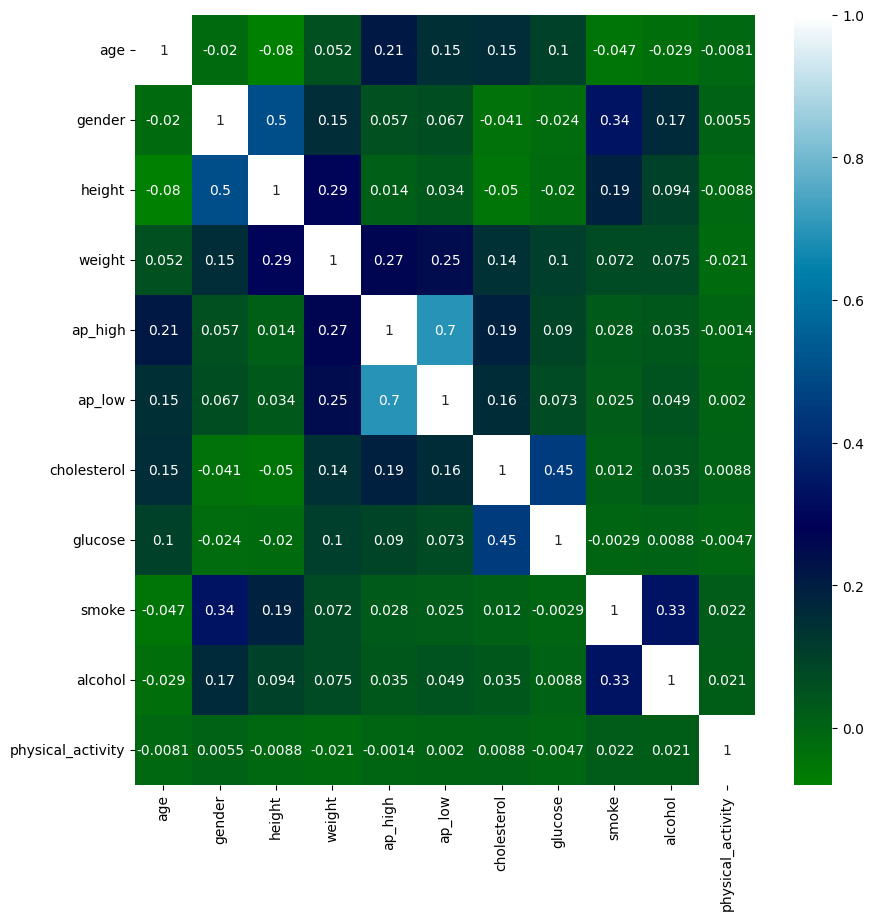

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,10))

sn.heatmap( df_train.corr(),
            annot = True,
            cmap = "ocean" )

plt.show()

## Feature importance: cardio disease rate and risk ratio

In [20]:
from IPython.display import display

In [21]:
global_cardio_disease = df_full_train.cardio_disease.mean()

In [22]:
for c in df.columns:
    df_group = df_full_train.groupby(c).cardio_disease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_cardio_disease
    df_group['risk'] = df_group['mean'] / global_cardio_disease
    display(df_group)
    print()
    print()

,mean,count,diff,risk
age,,,,
30,0.000000,3,-0.495111,0.000000
39,0.224684,316,-0.270428,0.453804
40,0.225791,2117,-0.269320,0.456041
41,0.264368,609,-0.230744,0.533956
42,0.288517,2090,-0.206595,0.582731
43,0.376838,544,-0.118273,0.761118
44,0.358356,2238,-0.136756,0.723788
45,0.387263,581,-0.107848,0.782174
46,0.396419,2346,-0.098692,0.800667


,mean,count,diff,risk
gender,,,,
1,0.491536,35798,-0.003576,0.992778
2,0.501768,19228,0.006657,1.013445


,mean,count,diff,risk
height,,,,
55,1.000000,1,0.504889,2.019747
57,1.000000,1,0.504889,2.019747
59,0.000000,1,-0.495111,0.000000
60,0.000000,1,-0.495111,0.000000
64,0.000000,1,-0.495111,0.000000
...,...,...,...,...
195,0.500000,6,0.004889,1.009874
196,0.250000,4,-0.245111,0.504937
197,0.666667,3,0.171555,1.346498


,mean,count,diff,risk
weight,,,,
11,1.000000,1,0.504889,2.019747
21,1.000000,1,0.504889,2.019747
23,0.000000,1,-0.495111,0.000000
28,0.000000,1,-0.495111,0.000000
29,1.000000,1,0.504889,2.019747
...,...,...,...,...
177,1.000000,1,0.504889,2.019747
178,0.333333,3,-0.161778,0.673249
180,1.000000,3,0.504889,2.019747


,mean,count,diff,risk
ap_high,,,,
60,0.000000,1,-0.495111,0.000000
70,0.090909,11,-0.404202,0.183613
80,0.333333,81,-0.161778,0.673249
85,0.250000,8,-0.245111,0.504937
90,0.165404,792,-0.329707,0.334074
...,...,...,...,...
202,1.000000,1,0.504889,2.019747
210,0.750000,16,0.254889,1.514811
215,1.000000,1,0.504889,2.019747


,mean,count,diff,risk
ap_low,,,,
40,0.500000,12,0.004889,1.009874
45,0.500000,2,0.004889,1.009874
49,0.500000,2,0.004889,1.009874
50,0.285714,42,-0.209397,0.577071
52,0.500000,2,0.004889,1.009874
...,...,...,...,...
150,0.857143,7,0.362031,1.731212
160,0.833333,6,0.338222,1.683123
170,1.000000,2,0.504889,2.019747


,mean,count,diff,risk
cholesterol,,,,
1,0.436954,41240,-0.058157,0.882538
2,0.591504,7486,0.096393,1.194689
3,0.761270,6300,0.266158,1.537573


,mean,count,diff,risk
glucose,,,,
1,0.476415,46789,-0.018696,0.962239
2,0.586215,4048,0.091104,1.184007
3,0.615899,4189,0.120787,1.243960


,mean,count,diff,risk
smoke,,,,
0,0.497392,50230,0.002281,1.004606
1,0.471226,4796,-0.023885,0.951758


,mean,count,diff,risk
alcohol,,,,
0,0.495857,52132,0.000745,1.001505
1,0.481686,2894,-0.013425,0.972885


,mean,count,diff,risk
physical_activity,,,,
0,0.533555,10818,0.038444,1.077647
1,0.485704,44208,-0.009407,0.980999


,mean,count,diff,risk
cardio_disease,,,,
0,0.0,27782,-0.495111,0.000000
1,1.0,27244,0.504889,2.019747


## Feature importance: Correlation

In [23]:
df_full_train.corrwith(df_full_train.cardio_disease).abs()

age                  0.238975
gender               0.009758
height               0.008426
weight               0.182024
ap_high              0.425448
ap_low               0.337085
cholesterol          0.218218
glucose              0.087754
smoke                0.014762
alcohol              0.006327
physical_activity    0.038036
cardio_disease       1.000000
dtype: float64

## DictVectorizer

In [24]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [25]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [26]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
X_train[0]

array([ 40.,   0., 140.,  90.,   1.,   1.,   1., 160.,   1.,   0.,  75.])

# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/cardio_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = model.predict_proba(X_val)[:,1]

In [31]:
cardio_disease_prob = (y_pred >= 0.5)

In [32]:
df_val[cardio_disease_prob]

,age,gender,height,weight,ap_high,ap_low,cholesterol,glucose,smoke,alcohol,physical_activity
1,52,1,165,80,150,80,1,1,0,0,1
2,50,1,156,89,130,80,2,1,0,0,1
8,58,1,167,111,130,80,1,1,0,0,1
10,52,1,161,103,140,95,2,1,0,0,1
13,53,1,163,63,130,80,3,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13747,58,1,167,79,140,90,1,1,0,0,0
13749,40,1,158,74,140,90,1,1,0,0,1
13754,60,1,156,59,160,100,1,1,0,0,1
13755,50,1,158,86,140,80,1,1,0,0,1


In [33]:
(y_val == cardio_disease_prob).mean()

0.7085847205059242

## Accurancy 

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.498
0.05 0.499
0.10 0.507
0.15 0.525
0.20 0.551
0.25 0.588
0.30 0.627
0.35 0.665
0.40 0.690
0.45 0.702
0.50 0.709
0.55 0.704
0.60 0.691
0.65 0.674
0.70 0.650
0.75 0.622
0.80 0.591
0.85 0.564
0.90 0.534
0.95 0.515
1.00 0.502


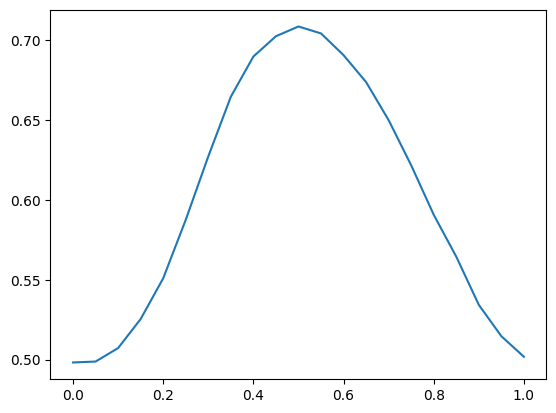

In [36]:
plt.plot(thresholds, scores)

## Confusion table

In [37]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [38]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [39]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [40]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[5255, 1648],
       [2361, 4493]])

In [41]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.38, 0.12],
       [0.17, 0.33]])

## ROC Curves

In [42]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [43]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

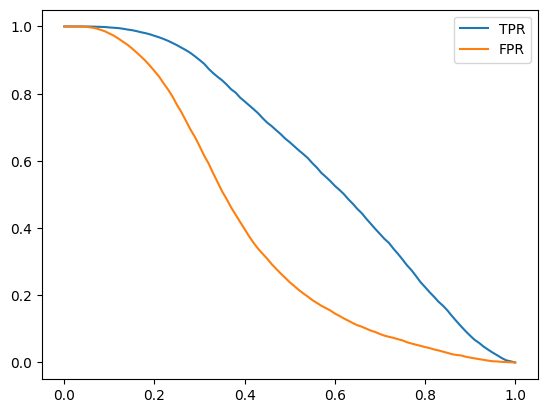

In [44]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [45]:
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

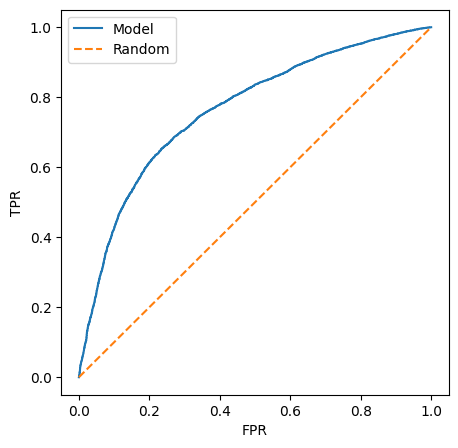

In [47]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC-AUC

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_val, y_pred)

0.7640878557218391

## Cross-Validation

In [50]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [51]:
def predict(df, dv, model):
    dicts = df[cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [53]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

/opt/anaconda3/envs/cardio_project/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.cardio_disease.values
        y_val = df_val.cardio_disease.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.4f' % (C, np.mean(scores), np.std(scores)))

 20%|█████████                                    | 1/5 [00:14<00:58, 14.72s/it]

C=0.001 0.7894 +- 0.0041


 40%|██████████████████                           | 2/5 [00:32<00:50, 16.68s/it]

C=0.01 0.7901 +- 0.0041


 60%|███████████████████████████                  | 3/5 [00:52<00:36, 18.10s/it]

C=0.1 0.7901 +- 0.0040


 80%|████████████████████████████████████         | 4/5 [01:13<00:19, 19.23s/it]

C=1 0.7902 +- 0.0040


100%|█████████████████████████████████████████████| 5/5 [01:34<00:00, 18.89s/it]

C=10 0.7901 +- 0.0040


In [55]:
dv, model = train(df_full_train, df_full_train.cardio_disease.values, C=0.1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.7907488238556902

# Decision trees

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [57]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, )

In [58]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [59]:
y_train = df_train.cardio_disease.values
y_val = df_val.cardio_disease.values
y_test = df_test.cardio_disease.values

In [60]:
del df_train['cardio_disease']
del df_val['cardio_disease']
del df_test['cardio_disease']

In [61]:
train_dicts = df_train.to_dict(orient='records')

In [62]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [65]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6326884789479934

In [66]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9991403432200403

In [67]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [68]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7652577694862062
val: 0.7627134812930068


In [69]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ap_high <= 129.50
|   |--- age <= 54.50
|   |   |--- class: 0
|   |--- age >  54.50
|   |   |--- class: 0
|--- ap_high >  129.50
|   |--- ap_high <= 138.50
|   |   |--- class: 1
|   |--- ap_high >  138.50
|   |   |--- class: 1



/opt/anaconda3/envs/cardio_project/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   2 -> 0.763
   3 -> 0.775
   4 -> 0.782
   5 -> 0.786
   6 -> 0.787
   7 -> 0.786
   8 -> 0.784
   9 -> 0.782
  10 -> 0.776
  11 -> 0.767
  12 -> 0.758
  20 -> 0.660
None -> 0.633


In [71]:
scores = []

for depth in [ 8, 9, 10, 11, 12]:
    for s in [10, 100, 200, 250, 300, 350, 400]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [72]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [73]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                            
max_depth            8      9      10     11     12
min_samples_leaf                                   
10                0.785  0.784  0.779  0.777  0.774
100               0.789  0.789  0.789  0.789  0.788
200               0.790  0.790  0.790  0.790  0.790
250               0.790  0.791  0.790  0.791  0.790
300               0.790  0.792  0.792  0.791  0.791
350               0.789  0.791  0.791  0.790  0.790
400               0.790  0.791  0.791  0.790  0.790

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

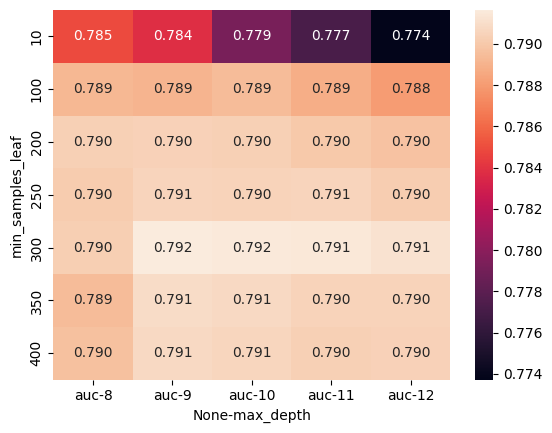

In [74]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [75]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=300)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=300)

In [76]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ap_high <= 129.50
|   |--- age <= 54.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 43.50
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- weight <= 59.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- weight >  59.50
|   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |--- weight <= 77.50
|   |   |   |   |   |   |   |   |--- ap_high <= 119.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- ap_high >  119.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- weight >  77.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |   |--- ap_low <= 72.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ap_low >  72.50
|   |   |   |   |   |   |   |   |--- weight <= 73.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- weight > 

/opt/anaconda3/envs/cardio_project/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [79]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

Text(0, 0.5, 'AUC')

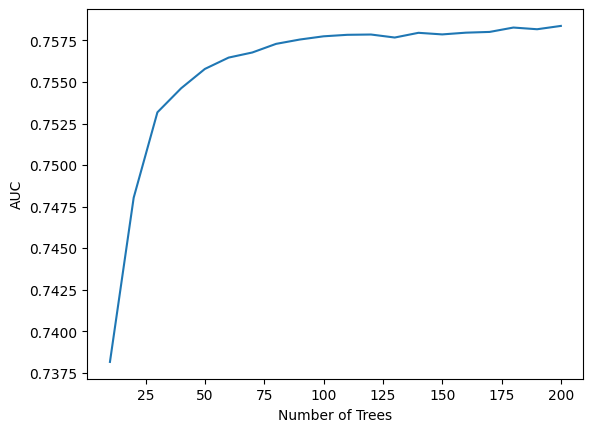

In [80]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('Number of Trees')
plt.ylabel('AUC')

In [81]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [82]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

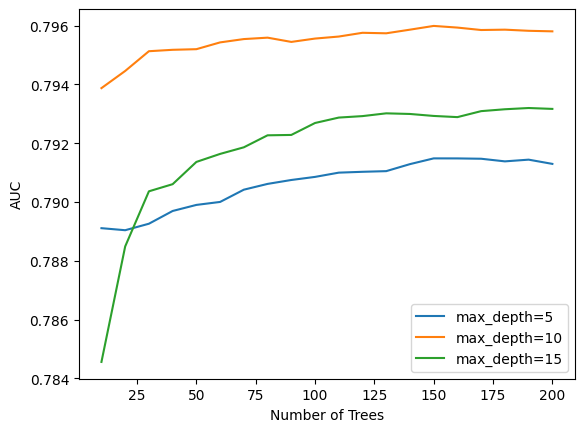

In [83]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
    
plt.xlabel('Number of Trees')
plt.ylabel('AUC')
plt.legend()

In [84]:
max_depth = 10

In [85]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [86]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

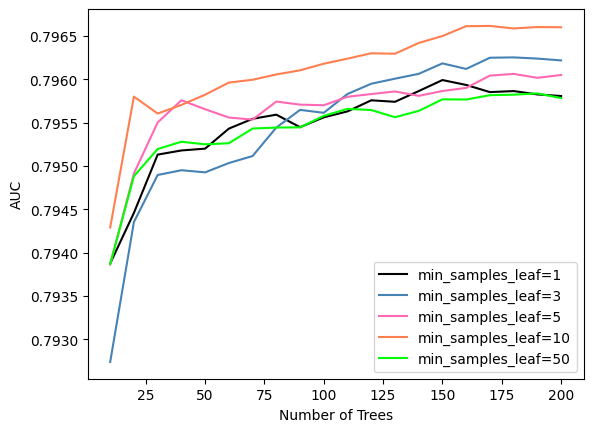

In [87]:
colors = ['black', 'steelblue', 'hotpink', 'coral', 'lime']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.xlabel('Number of Trees')
plt.ylabel('AUC')
plt.legend()

In [88]:
min_samples_leaf = 10

In [89]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=1)

# xgboost

In [90]:
import xgboost as xgb

In [91]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [92]:
#Default parameters
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [93]:
y_pred = model.predict(dval)

In [94]:
roc_auc_score(y_val, y_pred)

0.7956534166961826

In [95]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [96]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [97]:
s = output.stdout

In [98]:
print(s[:231])

[0]	train-auc:0.79938	val-auc:0.78745
[5]	train-auc:0.81084	val-auc:0.79411
[10]	train-auc:0.81561	val-auc:0.79578
[15]	train-auc:0.81910	val-auc:0.79535
[20]	train-auc:0.82206	val-auc:0.79493
[25]	train-auc:0.82398	val-auc:0.79458


In [99]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [100]:
df_score = parse_xgb_output(output)

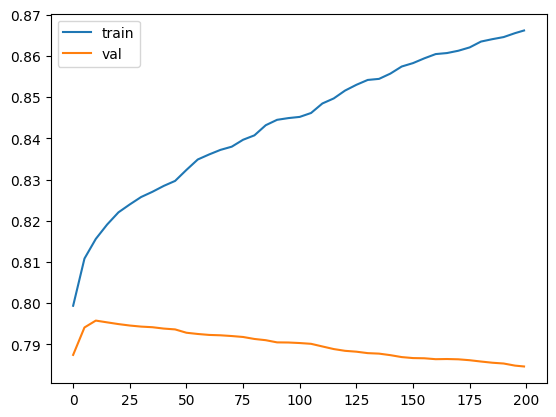

In [101]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

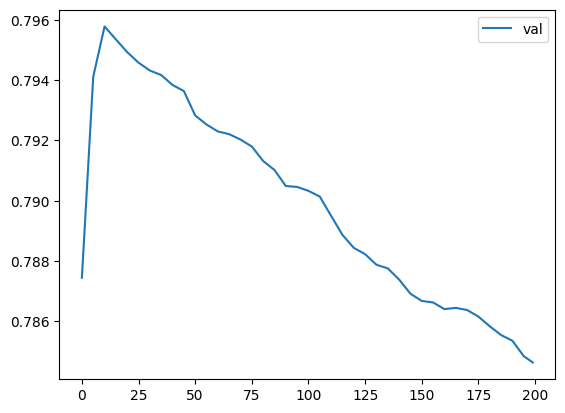

In [102]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

### Parameters Tuning

In [103]:
scores = {}

In [118]:
%%capture output

#run for eta = 0.3, 0.03, 0.1, 0.05, 0.01, 0.15

xgb_params = {
            'eta': 0.15, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

In [119]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.3', 'eta=0.03', 'eta=0.1', 'eta=0.05', 'eta=0.01', 'eta=0.015', 'eta=0.15'])

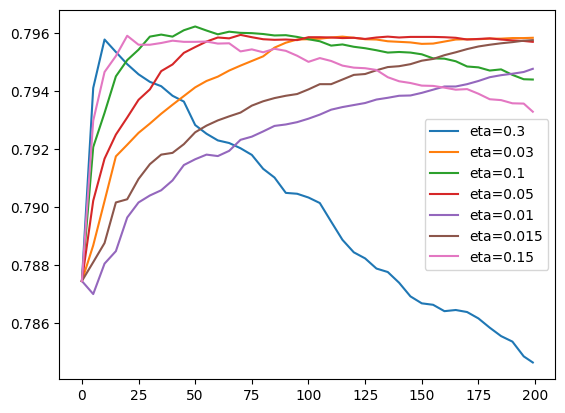

In [120]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    
plt.legend()

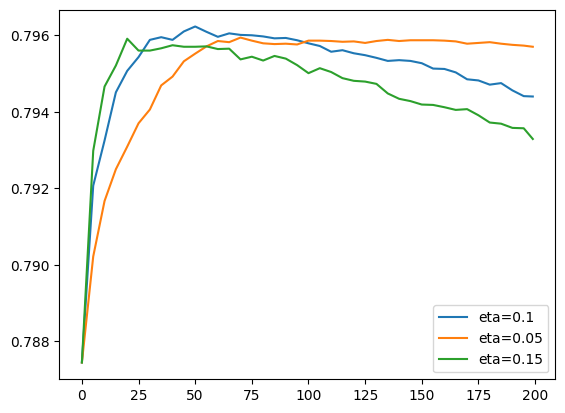

In [121]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.15']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    
plt.legend()

In [122]:
scores = {}

In [133]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10

xgb_params = {
            'eta': 0.1, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [134]:
scores.keys()

dict_keys(['max_depth=4', 'max_depth=5', 'max_depth=6', 'max_depth=7', 'max_depth=8', 'max_depth=10'])

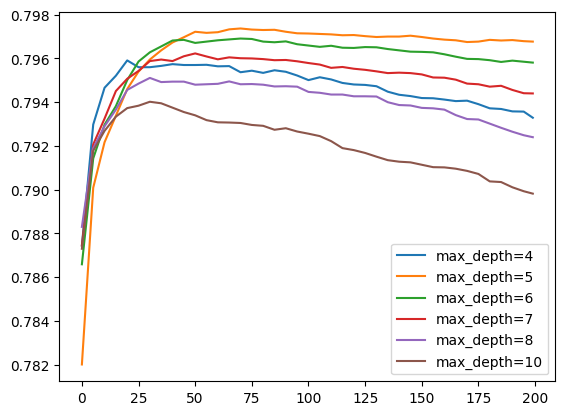

In [135]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

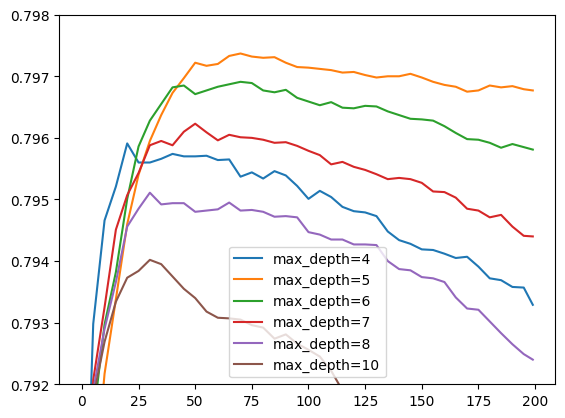

In [136]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.792,0.798)
plt.legend()

In [137]:
scores = {}

In [144]:
%%capture output

#run for min_child_weight: 1, 10, 30, 5

xgb_params = {
            'eta': 0.1, 
            'max_depth': 5,
            'min_child_weight': 5,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [145]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30', 'min_child_weight=5'])

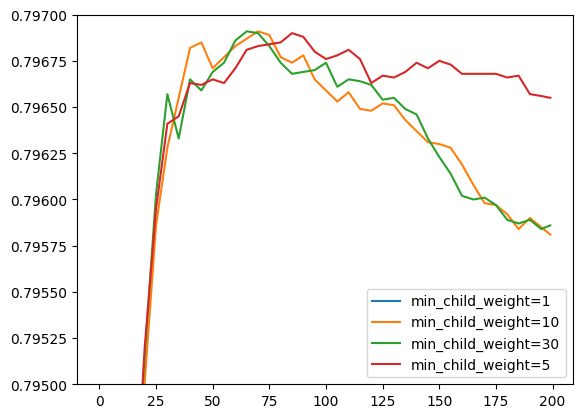

In [146]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.795,0.797)
#plt.xlim(55,100)
plt.legend()

In [147]:
xgb_params = {
            'eta': 0.1, 
            'max_depth': 5,
            'min_child_weight': 5,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=85)

## Select the best model

In [148]:
#Logistic Regresion
dv, model = train(df_full_train, df_full_train.cardio_disease.values, C=0.1)
y_pred_lr = predict(df_test, dv, model)

In [149]:
auc_lr = roc_auc_score(y_test, y_pred_lr)
auc_lr

0.7907488238556902

In [150]:
#Decision Trees
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=300)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=300)

In [151]:
y_pred_dt = dt.predict_proba(X_val)[:,1]
auc_dt = roc_auc_score(y_val, y_pred_dt)
auc_dt

0.7916406749563684

In [152]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=10, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=1)

In [153]:
y_pred_rf = rf.predict_proba(X_val)[:,1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
auc_rf

0.7966015143946625

In [154]:
#xgboost
xgb_params = {
            'eta': 0.1, 
            'max_depth': 5,
            'min_child_weight': 5,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=85)

In [155]:
y_pred_xgb = model.predict(dval)
auc_xgb = roc_auc_score(y_val, y_pred_xgb)
auc_xgb

0.797361715118512

### Train the final model

In [156]:
df_full_train

,age,gender,height,weight,ap_high,ap_low,cholesterol,glucose,smoke,alcohol,physical_activity,cardio_disease
0,52,1,158,76,125,80,2,1,1,1,0,0
1,46,2,169,82,150,90,1,1,1,0,1,1
2,56,2,180,60,140,90,1,1,0,1,1,0
3,51,1,158,62,120,80,1,1,0,0,1,0
4,42,1,162,68,110,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55021,60,1,165,65,120,79,1,2,0,0,0,1
55022,57,2,157,101,190,100,1,1,0,0,0,1
55023,52,2,175,70,120,80,1,1,0,0,1,0
55024,52,1,156,54,120,80,1,1,0,0,1,0


In [157]:
y_full_train = df_full_train.cardio_disease
y_full_train

0        0
1        1
2        0
3        0
4        0
        ..
55021    1
55022    1
55023    0
55024    0
55025    1
Name: cardio_disease, Length: 55026, dtype: int64

In [158]:
df_test

,age,gender,height,weight,ap_high,ap_low,cholesterol,glucose,smoke,alcohol,physical_activity
0,64,1,155,71,150,90,1,1,0,0,1
1,42,1,164,71,120,80,1,1,0,0,1
2,46,2,170,84,130,90,1,1,0,0,1
3,49,1,160,65,120,80,2,1,0,0,1
4,56,2,178,78,120,80,3,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13752,57,1,159,69,110,80,1,1,0,0,0
13753,47,2,178,80,120,80,1,1,0,0,1
13754,62,1,165,86,120,80,3,1,0,0,1
13755,62,2,174,60,150,90,1,1,1,1,1


In [159]:
del df_full_train['cardio_disease']

In [160]:
features = dv.get_feature_names_out()
features

array(['age', 'alcohol', 'ap_high', 'ap_low', 'cholesterol', 'gender',
       'glucose', 'height', 'physical_activity', 'smoke', 'weight'],
      dtype=object)

In [161]:
dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [162]:
d_full_train = xgb.DMatrix(X_full_train, label = y_full_train)
                   

d_test = xgb.DMatrix(X_test)

In [163]:
xgb_params = {
            'eta': 0.1, 
            'max_depth': 5,
            'min_child_weight': 5,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, d_full_train, num_boost_round=85)

In [164]:
y_pred = model.predict(d_test)

In [165]:
roc_auc_score(y_test, y_pred)

0.7997440660095141

### save the model

In [166]:
import pickle

In [167]:
output_file = f'model_xgb.bin'

In [168]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [169]:
!ls -lh *.bin

-rw-r--r--  1 marilinaorihuela  staff   195K Nov  4 18:13 model_xgb.bin


### Load the model

In [170]:
input_file = 'model_xgb.bin'

In [171]:
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [172]:
patient = {
    'age': 38,
    'gender': 1,
    'height': 165,
    'weight': 54,
    'ap_high': 120,
    'ap_low': 60,
    'cholesterol': 0,
    'glucose': 0,
    'smoke': 0,
    'alcohol': 0,
    'physical_activity': 1,  
}

In [173]:
X = dv.transform([patient])

In [174]:
d_test = xgb.DMatrix(X, feature_names = dv.get_feature_names_out())
y_pred = model.predict(d_test)

In [175]:
y_pred

array([0.05024994], dtype=float32)

### save with BentoML

In [176]:
import bentoml

In [177]:
bentoml.xgboost.save_model("cardiovascular_diseases_risk_model", model, 
                              custom_objects={
                                  "dictVectorizer": dv
                              },
                              signatures= {
                                  "predict":{
                                      "batchable": True,
                                      "batch_dim": 0
                                  }
                              }
                          )

Model(tag="cardiovascular_diseases_risk_model:t6r3xuc4qwj3zrft", path="/Users/marilinaorihuela/bentoml/models/cardiovascular_diseases_risk_model/t6r3xuc4qwj3zrft/")

In [178]:
import json

In [179]:
print(json.dumps(patient, indent=2))

{
  "age": 38,
  "gender": 1,
  "height": 165,
  "weight": 54,
  "ap_high": 120,
  "ap_low": 60,
  "cholesterol": 0,
  "glucose": 0,
  "smoke": 0,
  "alcohol": 0,
  "physical_activity": 1
}
